# Problem 1(part (a))


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix

In [2]:
def construct_H(size):
    H = make_spd_matrix(n_dim=size, random_state=1)
    return H
#print(pd.DataFrame(H))

In [3]:
#Solving the linear system of equations Hx = b
def conjugate_gradient(H, b, x_init, tolerance):
    
    r_curr = np.matmul(H, x_init) - b
    p_curr = -r_curr
    x_curr = x_init
    
    if np.linalg.norm(r_curr, 2) < tolerance:
        return x_curr
    
    iterations = 0
    while np.linalg.norm(r_curr, 2) > tolerance:
        H_p = np.matmul(H, p_curr)
        #alpha_curr = - np.dot(r_curr, p_curr) / np.dot(p_curr, H_p)
        alpha_curr = np.dot(r_curr, r_curr) / np.dot(p_curr, H_p)
        x_curr = x_curr + alpha_curr * p_curr
        r_next = r_curr + alpha_curr * H_p
        #beta = np.dot(r_curr, H_p) / np.dot(p_curr, H_p)
        beta = np.dot(r_next, r_next) / np.dot(r_curr, r_curr)
        p_curr = -r_next + beta*p_curr
        r_curr = r_next
        iterations += 1
        
    return x_curr, iterations

In [4]:
n=10
H = construct_H(n)
b = np.ones(n)
x_init = np.zeros(n)
tolerance = 1e-6
x_opt, iters = conjugate_gradient(H, b, x_init, tolerance)
condition_number = np.linalg.norm(H, 2) * np.linalg.norm(np.linalg.inv(H), 2)
print("The solution:\n",x_opt)
print("The number of iterations\n",iters)
print("The condition number:\n",condition_number)

The solution:
 [ 6.00193717  5.00479659  1.92926642 -0.26869897  1.88418717  0.01632841
  1.99972254  6.20275149  1.40741947  3.75708939]
The number of iterations
 11
The condition number:
 152.9820861811429


We know that for a symmetric positive definite matrix of order $n\times n$ , the convergence should have been achieved in at most n iterations. However, in computer, round off errors occur and higher the condition number of matrix, we get slower the rate of convergence. Hence we observe that number of iterations is 11 for n = 10 case.




**Part(b)**
 (Construct matrices with various eigenvalue distributions (clustered and non-clustered)
and apply the above CG method to them. Comment on the behaviour of the CG method in terms of
convergence

In [5]:
n = 10
H = np.diag(np.ones(10))
b = np.ones(n)
x_init = np.zeros(n)
tolerance = 1e-6
eig_values = np.linalg.eigvals(H)
unique_eigen_values = np.unique(eig_values)
x_opt, iters = conjugate_gradient(H, b, x_init, tolerance)

print('Unique Eigen Values are', unique_eigen_values)
print('Iterations to converge are', iters)

Unique Eigen Values are [1.]
Iterations to converge are 1


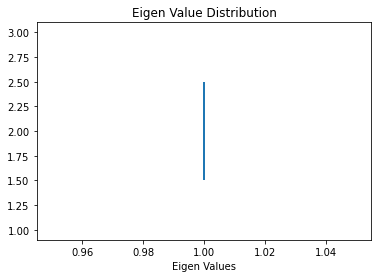

In [6]:
plt.figure()
plt.title('Eigen Value Distribution')
plt.eventplot(eig_values,lineoffsets=2)
plt.xlabel('Eigen Values')
#plt.axis('off')
plt.show()

In [7]:
n = 10
H = np.diag(np.append(np.ones(5), 5*np.ones(5)))
b = np.ones(n)
x_init = np.zeros(n)
tolerance = 1e-6
eig_values = np.linalg.eigvals(H)
unique_eigen_values = np.unique(eig_values)
x_opt, iters = conjugate_gradient(H, b, x_init, tolerance)


print('Unique Eigen Values are', unique_eigen_values)
print('Iterations to converge are', iters)

Unique Eigen Values are [1. 5.]
Iterations to converge are 2


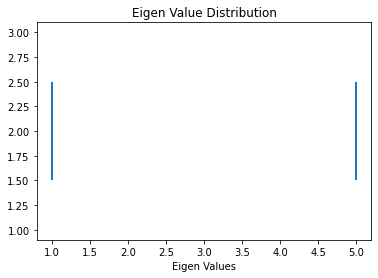

In [8]:
plt.figure()
plt.title('Eigen Value Distribution')
plt.eventplot(eig_values,lineoffsets=2)
plt.xlabel('Eigen Values')
plt.show()

In [9]:
n = 10
H = np.diag(np.arange(10) + 1)
b = np.ones(n)
x_init = np.zeros(n)
tolerance = 1e-6
eig_values = np.linalg.eigvals(H)
unique_eigen_values = np.unique(eig_values)
x_opt, iters = conjugate_gradient(H, b, x_init, tolerance)

print('Unique Eigen Values are', unique_eigen_values)
print('Iterations to converge are', iters)

Unique Eigen Values are [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Iterations to converge are 10


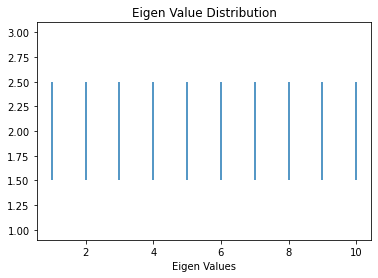

In [10]:
plt.figure()
plt.title('Eigen Value Distribution')
plt.eventplot(eig_values,lineoffsets=2)
plt.xlabel('Eigen Values')
#plt.axis('off')
plt.show()

Here we have taken simple diagonal matrices to show the eigen value distribution. For identity matrix, there is only one eigen value, hence it takes 1 step to converge. In second example, there are two eigen values 1 and 5, hence the procedure converges in 2 iterations. In third example, eigen values are well spread between 1 to 10 (i.e. every integer between 1 to 10). This takes 10 iterations to converge. Hence it's clear that when eigen values are clustered, less number of iterations are needed for convergence of CG. From Nocedal, Wright, when eigen values are clustered in r clusters, approximately r iterations are needed for convergence. This is clearly being justified in our examples. Here we have taken only diagonal matrices, but the principle will hold for general matrices.

In [11]:
n = 10
np.random.seed(5)
L = np.tril(4 * np.random.rand(n, n)) + 0.1
H = np.matmul(L, L.T)
b = np.ones(n)
x_init = np.zeros(n)
tolerance = 1e-6
eig_values = np.linalg.eigvals(H)
unique_eigen_values = np.unique(eig_values)
x_opt, iters = conjugate_gradient(H, b, x_init, tolerance)

print('Unique Eigen Values are', unique_eigen_values)
print('Iterations to converge are', iters)

Unique Eigen Values are [3.25558785e-03 1.91045242e-02 1.65778298e-01 8.85059910e-01
 3.80049434e+00 1.29482571e+01 1.55051716e+01 1.98333726e+01
 3.59253093e+01 2.08066229e+02]
Iterations to converge are 12


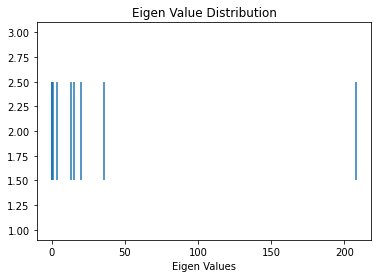

In [12]:
plt.figure()
plt.title('Eigen Value Distribution')
plt.eventplot(eig_values,lineoffsets=2)
plt.xlabel('Eigen Values')
#plt.axis('off')
plt.show()

Above we have shown for a general positive definite matrix. Its eigen values have 7 visible clusters and it has taken 12 iterations to converge, which is close to 7.

# Problem 2

**Part (a)**


Here The Objective fuction is  $-min(C^T X)$.

Where $C^T= [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.005]$

and $X = [u1, v1, v2, v3, v4, v5, v6, w1, w2, w3, w4, w5, w6, w7, z1, z2, z3, z4, z5, z6, z7, v]$

With

$U[i]= $Type 1 loan at quarter $i$\
$V[i]= $type 2 loan at quarter $i$\
$Z[i]=$ Type INVESTMENT at quarter $i$.\


In [13]:
import pandas as pd
import numpy as np

A1=np.zeros([8,6])
for i in range(6):
    A1[i,i]=1
for i in range(2,8):
    A1[i,i-2]=-1.036
A2=np.zeros([8,7])
for i in range(7):
    A2[i,i]=1
for i in range(1,8):
    A2[i,i-1]=-1.025
A3=np.zeros([8,7])
for i in range(7):
    A3[i,i]=-1
for i in range(1,8):
    A3[i,i-1]=1.005
A4=np.zeros([8,1])
A4[0,0]=1
A4[7,0]=-1.08
A5=np.zeros([8,1])
A5[7,0]=-1
A=np.concatenate((A4,A1,A2,A3,A5),axis=1)
print(A) #The Constraint matrix

[[ 1.     1.     0.     0.     0.     0.     0.     1.     0.     0.
   0.     0.     0.     0.    -1.     0.     0.     0.     0.     0.
   0.     0.   ]
 [ 0.     0.     1.     0.     0.     0.     0.    -1.025  1.     0.
   0.     0.     0.     0.     1.005 -1.     0.     0.     0.     0.
   0.     0.   ]
 [ 0.    -1.036  0.     1.     0.     0.     0.     0.    -1.025  1.
   0.     0.     0.     0.     0.     1.005 -1.     0.     0.     0.
   0.     0.   ]
 [ 0.     0.    -1.036  0.     1.     0.     0.     0.     0.    -1.025
   1.     0.     0.     0.     0.     0.     1.005 -1.     0.     0.
   0.     0.   ]
 [ 0.     0.     0.    -1.036  0.     1.     0.     0.     0.     0.
  -1.025  1.     0.     0.     0.     0.     0.     1.005 -1.     0.
   0.     0.   ]
 [ 0.     0.     0.     0.    -1.036  0.     1.     0.     0.     0.
   0.    -1.025  1.     0.     0.     0.     0.     0.     1.005 -1.
   0.     0.   ]
 [ 0.     0.     0.     0.     0.    -1.036  0.     0.     0.     0

In [14]:
cols = np.array("u1,v1,v2,v3,v4,v5,v6,w1,w2,w3,w4,w5,w6,w7,z1,z2,z3,z4,z5,z6,z7,v".split(","))
A = pd.DataFrame(A,columns = cols )
c = pd.Series(np.zeros(22),index=cols)
c[-1] = -1
print(c.shape)
b = [100,500,100,-600,-500,200,600,-900]
print()
print("B:-" , b)

(22,)

B:- [100, 500, 100, -600, -500, 200, 600, -900]


The constraints are given by $AX=b$.where bis given in the above.

In [15]:
basic  = np.array(['u1', 'v1', 'v2', 'v3', 'v6', 'w1', 'w7', 'z1'])
nonbasic = np.setdiff1d(cols,basic)
sn=np.ones(nonbasic.shape)*(-1)

while((sn<0).sum()>0):
    xb = pd.Series(np.linalg.inv(A[basic])@b,index = basic)
    xn = pd.Series(np.zeros(22-8),index = nonbasic)
    lamb = np.linalg.inv(A[basic].T)@c[basic]
    
    sn = c[nonbasic]-A[nonbasic].T@lamb
    
    if((sn<0).sum()==0):
        break;
    else:
        q = sn[sn<0].idxmin()
 
    d = np.linalg.inv(A[basic])@A[q]
    if((d>=0).sum()==0):
        print("problem is unbounded")
        break
    xq = xb/d
    p = xq[np.logical_and(d>0,xb>0)].idxmin()

    basic = np.append(basic[basic!=p],q)
    nonbasic = np.append(nonbasic[nonbasic!=q],p)
    
print("THE OPTIMAL FUNCTIONAL VALUE IS ",-np.linalg.inv(A[basic])@b@c[basic])

THE OPTIMAL FUNCTIONAL VALUE IS  468.2720606735533


In [16]:
# Using inbuilt solvers 
from scipy.optimize import linprog
res1 = linprog(c, A_eq=A, b_eq=b, method="revised simplex")
print("LINPROG IMPLEMENTED REVISED SIMPLEX :- ")
print()
print(res1)
for i in range(3):
    print()
print("LINPROG IMPLEMENTED INTERIOR POINT :- ")
print()
res = linprog(c, A_eq=A, b_eq=b, method="interior-point")
print(res)

LINPROG IMPLEMENTED REVISED SIMPLEX :- 

     con: array([ 0.00000000e+00,  0.00000000e+00,  1.42108547e-14,  0.00000000e+00,
        5.68434189e-14,  0.00000000e+00, -1.13686838e-13,  0.00000000e+00])
     fun: -468.2720606735534
 message: 'Optimization terminated successfully.'
     nit: 11
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([399.74809197,   0.        , 198.75316757,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        , 100.        ,   0.        ,   0.        ,
         0.        ,   0.        , 299.74809197,   0.        ,
         0.        , 291.5917184 , 793.04967699, 597.01492537,
         0.        , 468.27206067])



LINPROG IMPLEMENTED INTERIOR POINT :- 

     con: array([ 6.20060803e-09,  3.15683906e-08,  6.33032471e-09, -3.79643552e-08,
       -3.16248929e-08,  1.27035946e-08,  3.80356369e-08, -5.67586085e-08])
     fun: -468.27206055462534
 message: 'Optimization terminated successfully.'

In [17]:
import pulp as p
Lp_prob = p.LpProblem('problem',p.LpMinimize)
variables=[]
for i in cols:
    variables.append(p.LpVariable(i, lowBound=0))
Lp_prob += c.T@np.array(variables)
ind= 0
for i in A@np.array(variables):
    Lp_prob+=i==b[ind]
    ind+=1

In [18]:
status = Lp_prob.solve()
print(p.LpStatus[status])
print("OPTIMAL USING PULP IS ",p.value(Lp_prob.objective))

Optimal
OPTIMAL USING PULP IS  -468.27206


From The Above Outputs , 
It Can Be Seen That the optimal value for the self implemented simplex, linprog interior point, revised simplex and output using pulp is same, which is -468.27206055462534

# Problem 3

In [19]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import linalg
from cvxopt import matrix, solvers

# 3.(a) Geometrical Solution

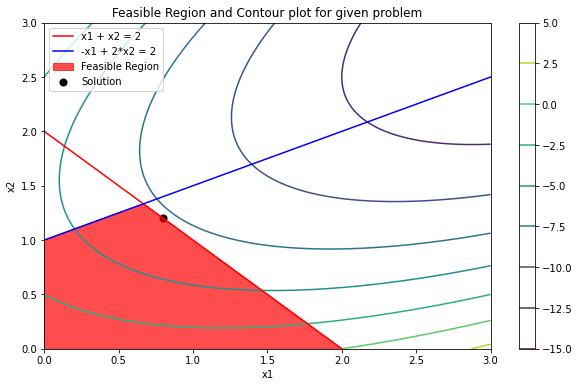

In [20]:
x_one = np.linspace(0, 3, 101)
x_two = np.linspace(0, 3, 101)
X_ONE, X_TWO = np.meshgrid(x_one, x_two)
z_obj = X_ONE**2 + 2*(X_TWO**2) - 2*X_ONE - 6*X_TWO - 2*X_ONE*X_TWO
x_two_ineq_one = 2 - x_one
x_two_ineq_two = 1 + x_one/2

# Co-ordinates of vertices of feasible region have to be found by solving the equations of intersecting lines.
ineq_A = np.array([[1, 1], [-1, 2]])
ineq_b = np.array([2, 2])
intersection = np.matmul(np.linalg.inv(ineq_A), ineq_b)
feasible_vertices_x = [0, 2, intersection[0], 0]
feasible_vertices_y = [0, 0, intersection[1], 1]


plt.figure(figsize = (10, 6))
plt.plot(x_one, x_two_ineq_one, c = 'red', label = 'x1 + x2 = 2')
plt.plot(x_one, x_two_ineq_two, c = 'blue', label = '-x1 + 2*x2 = 2')
plt.fill(feasible_vertices_x, feasible_vertices_y, c = 'red', label = 'Feasible Region', alpha = 0.7)
plt.contour(X_ONE, X_TWO, z_obj)
plt.colorbar()
plt.scatter([0.8], [1.2], c = 'black', s = 50, label = 'Solution') #This is derived in the next cell.
plt.legend()
plt.xlim([0, 3])
plt.ylim([0, 3])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Feasible Region and Contour plot for given problem')
plt.show()

As expected, the conour is an ellipsoid. From the plot, it's obvious that the solution will be somewhere along the two boundaries defined by two constraints. Interior point is definitely not a solution, because as per contour plot interior points will have higher value of objective function than at least one of the boundary points.

In [21]:
# Geometric Solution of Quadratic Programming Problem
x_one_space = np.linspace(0, 2, 1000)
blue_filter = x_one_space < intersection[0]
red_filter = x_one_space > intersection[0]
len_blue = np.sum(blue_filter)
x_two_space_blue = 1 + x_one_space/2
x_two_space_red = 2 - x_one_space
x_two_space = x_two_space_blue * blue_filter + x_two_space_red * red_filter

obj_boundary = x_one_space**2 + 2*(x_two_space**2) - 2*x_one_space - 6*x_two_space - 2*x_one_space*x_two_space
#print(np.min(obj_boundary))
sol_arg = np.argmin(obj_boundary)
sol = np.array([x_one_space[sol_arg], x_two_space[sol_arg]])
sol_value = obj_boundary[sol_arg]

print('Solution is ', sol, 'and objective function value is ', sol_value, '.')

Solution is  [0.8008008 1.1991992] and objective function value is  -7.199996793590386 .


Here we found the solution to be close to (0.8, 1.2) geometrically. This turns out to be correct as we later show through the use of CVXOPT library.

# 3.(b) Active Set Method

In [22]:
#Solving the QP subproblem with equality constraints
def subproblem(G, gk, constr):
    
    len_sol = len(G)
    len_lamda = len(constr)
    left_matrix = np.concatenate((G, constr), axis = 0)
    right_matrix = np.concatenate((-constr.T, np.zeros((len_lamda, len_lamda))), axis = 0)
    kkt_matrix = np.concatenate((left_matrix, right_matrix), axis = 1)
    rhs_vector = np.concatenate((-gk, np.zeros(len_lamda)), axis = 0)
    sol_total = np.matmul(np.linalg.inv(kkt_matrix), rhs_vector)
    sol_x = sol_total[:len_sol]
    sol_lamda = sol_total[len_sol:]
    return sol_x, sol_lamda

In [23]:
#Active Set Method as described in Algorithm 16.3 of Nocedal, Wright.
def active_set(G, c, A_ineq, b_ineq, A_eq, b_eq, x_init):
    
    x_curr = np.array(x_init)
    
    if A_eq is None:
        num_eq = 0
        num_ineq = len(b_ineq)
        A_constr = A_ineq
        b_constr = b_ineq
    elif A_ineq is None:
        num_ineq = 0
        num_eq = len(b_eq)
        A_constr = A_eq
        b_constr = b_eq
    else:
        num_ineq = len(b_ineq)
        num_eq = len(b_eq)
        A_constr = np.concatenate((A_eq, A_ineq), axis = 0)
        b_constr = np.concatenate((b_eq, b_ineq), axis = 0)
        
    equality_indices = np.array(list(range(0, num_eq)))
    inequality_indices = np.array(range(num_eq, num_eq + num_ineq))
    working_set = (np.matmul(A_constr, x_curr) - b_constr == 0)
    working_indices = np.nonzero(working_set)[0]
    nonworking_indices = np.nonzero(working_set == 0)[0]
    #print(nonworking_indices)
    iterations = 0
    
    while True:
        iterations += 1
        gk = np.matmul(G, x_curr) + c
        constr = A_constr[working_indices]
        p, _ = subproblem(G, gk, constr)
        #print(x_curr)
        #print(working_indices)
        
        
        if np.all(p < 1e-5): #Using a small number rather than 0 to avoid numerical round-off issues and infinite iteration
            lamda_vec = scipy.linalg.lstsq(constr.T, gk)[0]
            if np.all(lamda_vec[np.nonzero(working_indices >= num_eq)[0]] >= 0):
                return (x_curr, iterations)
            else:
                min_j = working_indices[np.argmin(lamda_vec)]
                x_curr = x_curr
                working_indices = np.delete(working_indices, np.argwhere(working_indices == min_j))
                nonworking_indices = np.append(nonworking_indices, min_j)
        else:
            temp_arr = A_constr[nonworking_indices]
            temp_Apk = np.matmul(temp_arr, p) < 0
            nonzero_index = np.nonzero(temp_Apk)[0]
            temp_working_index = nonworking_indices[nonzero_index]
            temp_b_constr = b_constr[temp_working_index]
            temp_fraction = (temp_b_constr - np.matmul(temp_arr[nonzero_index], x_curr))/(np.matmul(temp_arr[nonzero_index], p))
            temp_index, temp_value = (np.argmin(temp_fraction), np.min(temp_fraction))
            alpha = np.min([1, temp_value])
            x_curr = x_curr + alpha*p
            if (alpha < 1):
                index_added = temp_working_index[temp_index]
                working_indices = np.append(working_indices, index_added)
                nonworking_indices = np.delete(nonworking_indices, np.argwhere(nonworking_indices == index_added))
            else:
                working_indices = working_indices
            

# 3.(c) Solution For Different Starting Points

In [24]:
#Defining objective function and constraint matrices

G = 2*np.array([[1.0, -1.0], [-1.0, 2.0]])
c = np.array([-2.0, -6.0])
A_ineq = np.array([[-1.0, -1.0], [1.0, -2.0], [1.0, 0], [0, 1.0]])
b_ineq = np.array([-2, -2, 0, 0])
A_eq = None
b_eq = None

### Starting From Interior Points

In [25]:
x_init_list_interior = [[0.25, 0.25], [0.25, 0.5], [0.25, 1], [0.5, 0.5], [0.5, 1], [1, 0.5], [0.75, 0.75]]

iteration_interior = []
sol_interior = []
for x_init in x_init_list_interior:
    sol, iterations = active_set(G, c, A_ineq, b_ineq, A_eq, b_eq, x_init)
    print('Solution is ', sol, 'and it took ', iterations, 'number of iterations with starting point as ', x_init, '.')
    iteration_interior.append(iterations)
    sol_interior.append(sol)

Solution is  [0.8 1.2] and it took  3 number of iterations with starting point as  [0.25, 0.25] .
Solution is  [0.8 1.2] and it took  3 number of iterations with starting point as  [0.25, 0.5] .
Solution is  [0.8 1.2] and it took  3 number of iterations with starting point as  [0.25, 1] .
Solution is  [0.8 1.2] and it took  3 number of iterations with starting point as  [0.5, 0.5] .
Solution is  [0.8 1.2] and it took  2 number of iterations with starting point as  [0.5, 1] .
Solution is  [0.8 1.2] and it took  3 number of iterations with starting point as  [1, 0.5] .
Solution is  [0.8 1.2] and it took  3 number of iterations with starting point as  [0.75, 0.75] .


### Starting From Vertex Points

In [26]:
x_init_list_vertex = [[0, 0], [0, 1], [2, 0], [0.6666667, 1.3333333]]

iteration_vertex = []
sol_vertex = []
for x_init in x_init_list_vertex:
    sol, iterations = active_set(G, c, A_ineq, b_ineq, A_eq, b_eq, x_init)
    print('Solution is ', sol, 'and it took ', iterations, 'number of iterations with starting point as ', x_init, '.')
    iteration_vertex.append(iterations)
    sol_vertex.append(sol)

Solution is  [0.8 1.2] and it took  7 number of iterations with starting point as  [0, 0] .
Solution is  [0.8 1.2] and it took  5 number of iterations with starting point as  [0, 1] .
Solution is  [0.8 1.2] and it took  3 number of iterations with starting point as  [2, 0] .
Solution is  [0.8 1.2] and it took  2 number of iterations with starting point as  [0.6666667, 1.3333333] .


### Starting From Boundary Points

In [27]:
x_init_list_boundary = [[0.5, 0], [1, 0], [1.5, 0], [0, 0.5], [0.25, 1.125], [0.5, 1.25], [1.0, 1.0], [1.5, 0.5]]

sol_boundary = []
iteration_boundary = []
for x_init in x_init_list_boundary:
    sol, iterations = active_set(G, c, A_ineq, b_ineq, A_eq, b_eq, x_init)
    print('Solution is ', sol, 'and it took ', iterations, 'number of iterations with starting point as ', x_init, '.')
    iteration_boundary.append(iterations)
    sol_boundary.append(sol)

Solution is  [0.8 1.2] and it took  5 number of iterations with starting point as  [0.5, 0] .
Solution is  [0.8 1.2] and it took  4 number of iterations with starting point as  [1, 0] .
Solution is  [0.8 1.2] and it took  4 number of iterations with starting point as  [1.5, 0] .
Solution is  [0.8 1.2] and it took  6 number of iterations with starting point as  [0, 0.5] .
Solution is  [0.8 1.2] and it took  4 number of iterations with starting point as  [0.25, 1.125] .
Solution is  [0.8 1.2] and it took  4 number of iterations with starting point as  [0.5, 1.25] .
Solution is  [0.8 1.2] and it took  2 number of iterations with starting point as  [1.0, 1.0] .
Solution is  [0.8 1.2] and it took  2 number of iterations with starting point as  [1.5, 0.5] .


While we can't generalize too much, it is observed that a good starting guess (closer to the solution) results in fewer number of iterations required to converge to the solution. Further we observe that when we start with interior points, we almost always reached solution within 3 iterations for this QP problem irrespective of exact starting point. However, when we start from vertices, there is a significant difference in number of iterations required for convergence. Starting at (0, 0), which is farthest to the solution required 7 iterations while starting from (0.667, 1.333) took only 2 iterations. Further we observe that starting at different boundary points lead to convergence of solution in 2 to 6 iterations depending on starting point. Points far away such as (0, 0.5) and (0.5, 0) required 6 and 5 iterations respectively, whereas closer starting points such as (1.0, 1.0) and (1.5, 0.5) required only 2 iterations. While this trend is somewhat expected, we can't generalize it too much as far away starting guesses may also lead to convergence in fewer number of iterations in some cases. Another important point to note is that we always reached optimal point. This is expected as it's a convex quadratic programming problem and active set method is globally convergent for convex QP problems.

In [28]:
results = pd.DataFrame()
results['Starting Point'] = x_init_list_interior + x_init_list_vertex + x_init_list_boundary
results['Point Type'] = ['Interior']*len(x_init_list_interior) + ['Vertex']*len(x_init_list_vertex) + ['Boundary']*len(x_init_list_boundary)
results['Results'] = sol_interior + sol_vertex + sol_boundary
results['Iterations'] = iteration_interior + iteration_vertex + iteration_boundary
results

,Starting Point,Point Type,Results,Iterations
0,"[0.25, 0.25]",Interior,"[0.7999999999999997, 1.1999999999999997]",3
1,"[0.25, 0.5]",Interior,"[0.7999999999999996, 1.1999999999999997]",3
2,"[0.25, 1]",Interior,"[0.7999999999999995, 1.1999999999999997]",3
3,"[0.5, 0.5]",Interior,"[0.7999999999999996, 1.1999999999999997]",3
4,"[0.5, 1]",Interior,"[0.8, 1.2]",2
5,"[1, 0.5]",Interior,"[0.7999999999999996, 1.1999999999999997]",3
6,"[0.75, 0.75]",Interior,"[0.7999999999999996, 1.1999999999999997]",3
7,"[0, 0]",Vertex,"[0.7999999999999994, 1.1999999999999997]",7
8,"[0, 1]",Vertex,"[0.7999999999999994, 1.1999999999999997]",5
9,"[2, 0]",Vertex,"[0.7999999999999998, 1.2]",3


# 3.(d) CVXOPT Solution

In [29]:
from cvxopt import matrix, solvers

In [30]:
Q = 2*matrix(np.array([[1.0, -1.0], [-1.0, 2.0]]))
p = matrix([-2.0, -6.0])

G = matrix(np.array([[1.0, 1.0], [-1.0, 2.0], [-1.0, 0], [0, -1.0]]))
h = matrix([2.0, 2.0, 0, 0])

sol = solvers.qp(Q,p,G,h)
print(sol['x'])

     pcost       dcost       gap    pres   dres
 0: -9.7394e+00 -9.9108e+00  2e+01  1e+00  9e-01
 1: -6.8303e+00 -8.8469e+00  2e+00  1e-16  4e-16
 2: -7.1760e+00 -7.3253e+00  1e-01  9e-17  5e-16
 3: -7.1998e+00 -7.2072e+00  7e-03  2e-16  1e-15
 4: -7.2000e+00 -7.2001e+00  9e-05  9e-17  7e-15
 5: -7.2000e+00 -7.2000e+00  9e-07  2e-16  2e-14
Optimal solution found.
[ 8.00e-01]
[ 1.20e+00]



As can be observed, the solution obtained from CVXOPT is (0.8, 1.2). This proves the correctness of our implementation of active set method and geometrical solution.

The algorithm used by CVXOPT is a primal dual path following scheme which is part of interior point method.

One difference between this primal dual path following interior point method and active set method is that in the former, both primal and dual variables are updated in every iteration, whereas in the latter, the way we have implemented, only primal variables get updated.

Another difference is, in the primal dual interior point method, perturbed KKT system of equations is solved. The complementary slackness condition is perturbed in this method. However, in active set method, actual KKT system is solved.

Compared to another interior point method known as Barrier method, this primal dual path following method requires fewer number of newton step (1 to be precise) per iteration. 

Further under most conditions, primal dual path following algorithm is highly efficient. While general interior point methods guarantee provably polynomial time complexity (active set methods don't have provable polynomial time complexity property, even though they work well and converge reasonably quickly in practice), primal dual path following algorithm goes one step further and can have better than linear convergence under suitable conditions.